In [1]:
#Import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
#Set global variables
fpath = "/Users/chuying/Documents/dataeng_assessment/q5/"

In [3]:
# Change the current working directory
os.chdir(fpath)
print("Current working dir: ", os.getcwd())

Current working dir:  /Users/chuying/Documents/dataeng_assessment/q5


In [4]:
# reading car data files
cars =  pd.read_csv('car.data', sep=",")
print(cars)

     buying  maint  doors persons lug_boot safety car_class
0     vhigh  vhigh      2       2    small    low     unacc
1     vhigh  vhigh      2       2    small    med     unacc
2     vhigh  vhigh      2       2    small   high     unacc
3     vhigh  vhigh      2       2      med    low     unacc
4     vhigh  vhigh      2       2      med    med     unacc
...     ...    ...    ...     ...      ...    ...       ...
1723    low    low  5more    more      med    med      good
1724    low    low  5more    more      med   high     vgood
1725    low    low  5more    more      big    low     unacc
1726    low    low  5more    more      big    med      good
1727    low    low  5more    more      big   high     vgood

[1728 rows x 7 columns]


In [5]:
## Step 1: Business Understanding
# Create a machine learning model to predict the buying price given the following parameters:

# Maintenance = High
# Number of doors = 4
# Lug Boot Size = Big
# Safety = High
# Class Value = Good

In [6]:
#Step 2: Data Understanding
#2.1 Data is structured
#2.2 Entity of interest - Buying Price
#2.3 1 row  = 1 record
#2.4 1 column = 1 field
#2.5 Yes, there is a data column to identify my event
#2.6 Categorise my variables - all are categorical variables
#Training model : Log regression

In [7]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   buying     1728 non-null   object
 1   maint      1728 non-null   object
 2   doors      1728 non-null   object
 3   persons    1728 non-null   object
 4   lug_boot   1728 non-null   object
 5   safety     1728 non-null   object
 6   car_class  1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [8]:
cars.head()

,buying,maint,doors,persons,lug_boot,safety,car_class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [9]:
#Step3: Data Preparation
#Check for missing data
check_null = cars.isnull().sum()
print(check_null)

buying       0
maint        0
doors        0
persons      0
lug_boot     0
safety       0
car_class    0
dtype: int64


In [10]:
cars.describe()

,buying,maint,doors,persons,lug_boot,safety,car_class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [11]:
cars.dtypes

buying       object
maint        object
doors        object
persons      object
lug_boot     object
safety       object
car_class    object
dtype: object

In [12]:
#Remove column not required for prediction model
cars.drop(columns=['persons'], inplace = True)

In [13]:
#Convert buying price to codes, replace string in doors
cars['buying'].replace(to_replace=['vhigh', 'high', 'med','low'], value=[10, 7, 4, 1], inplace=True)
cars['doors'].replace(to_replace=['5more'], value=[5], inplace=True)
print(cars)

      buying  maint doors lug_boot safety car_class
0         10  vhigh     2    small    low     unacc
1         10  vhigh     2    small    med     unacc
2         10  vhigh     2    small   high     unacc
3         10  vhigh     2      med    low     unacc
4         10  vhigh     2      med    med     unacc
...      ...    ...   ...      ...    ...       ...
1723       1    low     5      med    med      good
1724       1    low     5      med   high     vgood
1725       1    low     5      big    low     unacc
1726       1    low     5      big    med      good
1727       1    low     5      big   high     vgood

[1728 rows x 6 columns]


In [14]:
#Step 4: Build training model
X = cars[['maint', 'doors', 'lug_boot','safety','car_class']]
X = pd.get_dummies(data=X)
X.head()

,maint_high,maint_low,maint_med,maint_vhigh,doors_5,doors_2,doors_3,doors_4,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med,car_class_acc,car_class_good,car_class_unacc,car_class_vgood
0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0
1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0
2,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0
3,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0
4,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0


In [15]:
Y = cars['buying']
Y

0       10
1       10
2       10
3       10
4       10
        ..
1723     1
1724     1
1725     1
1726     1
1727     1
Name: buying, Length: 1728, dtype: int64

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1036, 18)
(692, 18)
(1036,)
(692,)


In [17]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [18]:
# print the intercept
print(model.intercept_)

-585637056117938.8


In [19]:
# A positive sign indicates that as the predictor variable increases, the Target variable also increases.
# A negative sign indicates that as the predictor variable increases, the Target variable decreases.

coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
maint_high,6.108197e+13
maint_low,6.108197e+13
maint_med,6.108197e+13
maint_vhigh,6.108197e+13
doors_5,-1.082787e+14
doors_2,-1.082787e+14
doors_3,-1.082787e+14
doors_4,-1.082787e+14
lug_boot_big,3.657272e+14
lug_boot_med,3.657272e+14


In [20]:
predictions = model.predict(X_test)
predictions

array([6.5  , 6.75 , 7.   , 5.5  , 5.5  , 6.5  , 6.5  , 6.5  , 7.5  ,
       5.75 , 5.   , 6.   , 7.   , 6.   , 6.5  , 5.875, 6.   , 6.   ,
       5.   , 7.   , 6.   , 6.25 , 7.25 , 6.75 , 5.625, 4.5  , 4.75 ,
       6.75 , 6.25 , 5.75 , 5.25 , 5.75 , 6.   , 5.   , 6.   , 5.   ,
       6.25 , 6.5  , 7.25 , 4.5  , 4.75 , 7.25 , 6.5  , 5.   , 4.75 ,
       5.75 , 5.25 , 5.   , 5.25 , 5.5  , 4.5  , 5.25 , 6.75 , 5.5  ,
       5.25 , 5.25 , 4.75 , 6.   , 7.75 , 6.5  , 5.5  , 5.   , 2.   ,
       6.   , 5.375, 4.75 , 5.875, 7.   , 7.25 , 6.5  , 5.25 , 6.   ,
       7.25 , 5.5  , 7.   , 4.875, 6.   , 1.5  , 6.25 , 6.25 , 6.25 ,
       6.75 , 5.25 , 5.   , 6.5  , 6.5  , 1.25 , 4.5  , 5.5  , 5.25 ,
       7.75 , 6.25 , 2.   , 6.25 , 1.5  , 6.   , 6.25 , 2.375, 4.5  ,
       6.75 , 2.   , 6.   , 6.5  , 5.25 , 5.875, 4.5  , 7.25 , 6.   ,
       6.75 , 1.875, 5.25 , 5.75 , 4.5  , 5.25 , 5.25 , 6.5  , 6.   ,
       5.75 , 6.75 , 5.25 , 7.25 , 4.75 , 5.25 , 6.75 , 6.   , 6.5  ,
       6.25 , 2.   ,

In [21]:
# Maintenance = High
# Number of doors = 4
# Lug Boot Size = Big
# Safety = High
# Class Value = Good

predicted_buying = model.predict([[1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0]])
predicted_buying #i.e. Predicted buying price is low 

/usr/local/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1.75])

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='buying'>

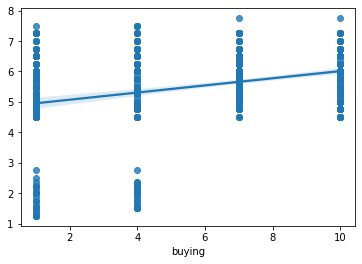

In [22]:
sns.regplot(y_test,predictions)

In [23]:
y_pred = model.predict(X_test)
mean_squared_error(y_test,y_pred)

10.070199602601155

In [24]:
np.sqrt(mean_squared_error(y_test, y_pred))

3.1733577804277213